In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler # normalizar os dados
from sklearn.preprocessing import StandardScaler


In [17]:
# Import data
dados = pd.read_csv("C:/Projetos Pessoais/DataScience/Previsao_Juros_BACEN_IA/data/dados_aprendizado_supervisionado", index_col='data')

In [18]:
dados

,PIB,Cambio_Dolar,IGPM,Inflacao_Mensal,Selic
data,,,,,
2002-01-01,112374.8,2.3066,0.36,0.52,19.00
2002-02-01,111477.1,2.4161,0.06,0.36,19.00
2002-03-01,118444.7,2.3596,0.09,0.60,18.75
2002-04-01,120385.9,2.3220,0.56,0.80,18.50
2002-05-01,123552.5,2.3770,0.83,0.21,18.50
...,...,...,...,...,...
2024-08-01,993497.3,5.6681,0.29,-0.02,10.50
2024-09-01,982214.4,5.6230,0.62,0.44,10.50
2024-10-01,1014792.0,5.4521,1.52,0.56,10.75


In [19]:
dados.columns

Index(['PIB', 'Cambio_Dolar', 'IGPM', 'Inflacao_Mensal', 'Selic'], dtype='object')

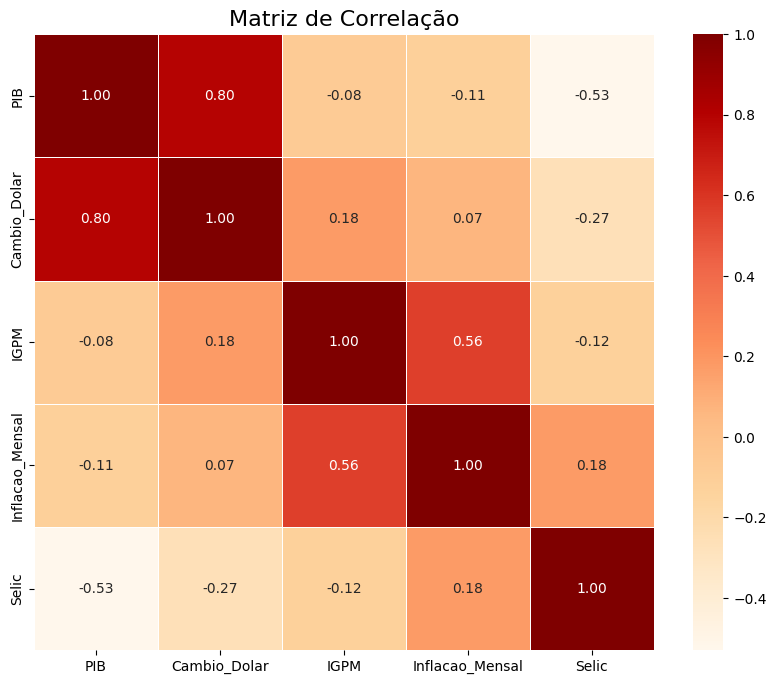

In [20]:
correlacao = dados.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap="OrRd", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação", fontsize=16)
plt.show()

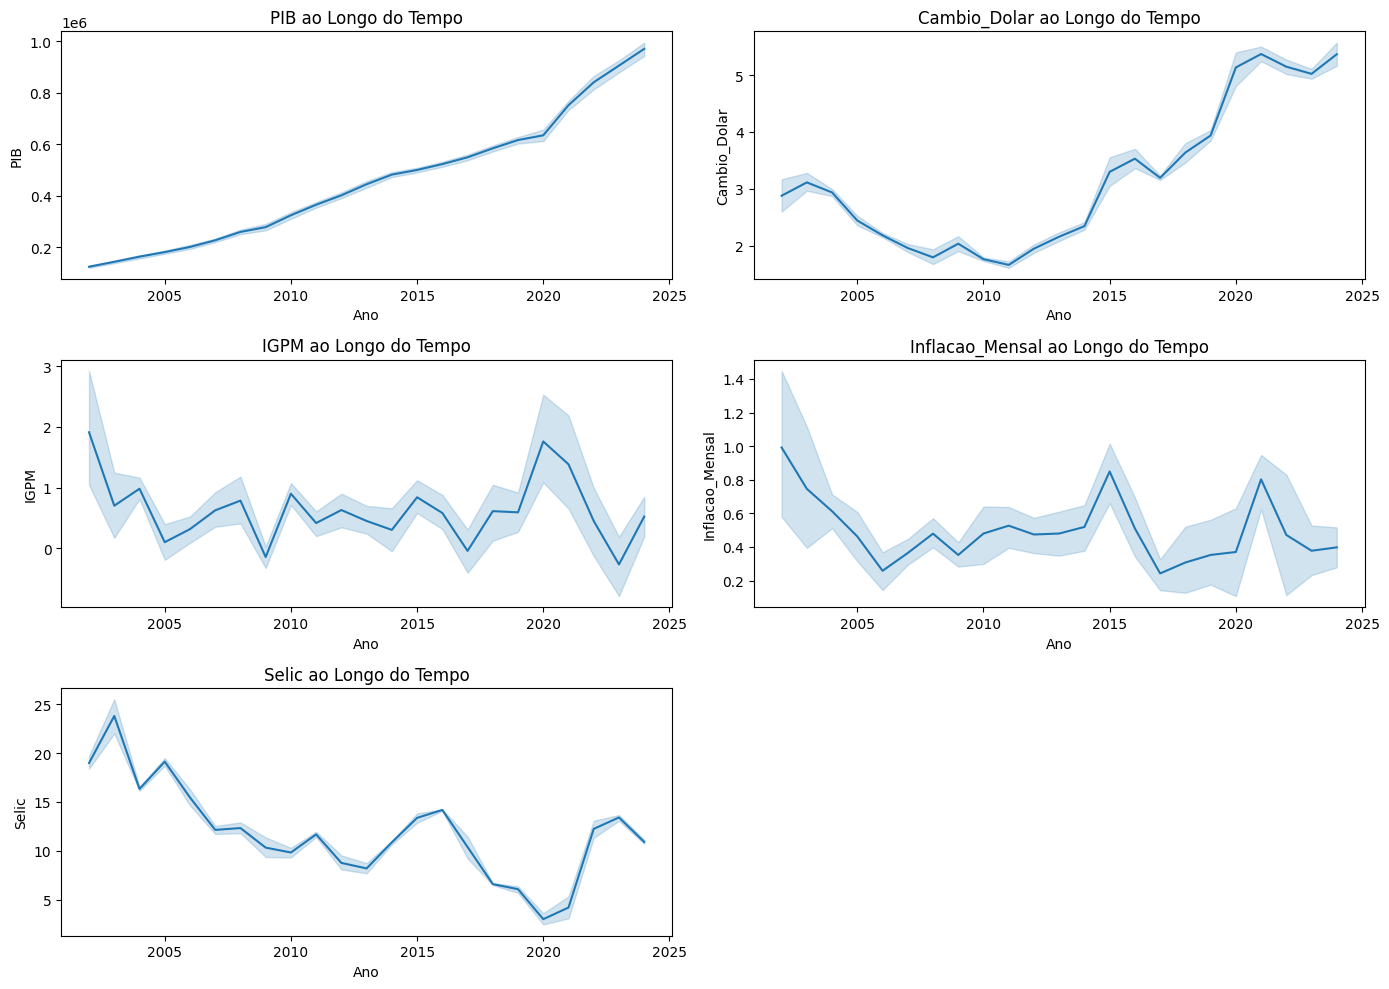

In [21]:
dados.index = pd.to_datetime(dados.index)

# Criando o gráfico para cada variável, agora com o eixo X representando apenas o ano
plt.figure(figsize=(14, 10))

variaveis = ['PIB', 'Cambio_Dolar', 'IGPM', 'Inflacao_Mensal', 'Selic']

for i, var in enumerate(variaveis, 1):
    plt.subplot(3, 2, i)  # Layout de 3 linhas e 2 colunas
    sns.lineplot(data=dados, x=dados.index.year, y=var)
    plt.title(f'{var} ao Longo do Tempo')
    plt.xlabel('Ano')
    plt.ylabel(var)

# Ajustando o layout para não sobrepor os gráficos
plt.tight_layout()
plt.show()

# Pré Processamento dos Dados

In [32]:
dados.head()

,PIB,Cambio_Dolar,IGPM,Inflacao_Mensal,Selic
data,,,,,
2002-01-01,112374.8,2.3066,0.36,0.52,19.00
2002-02-01,111477.1,2.4161,0.06,0.36,19.00
2002-03-01,118444.7,2.3596,0.09,0.60,18.75
2002-04-01,120385.9,2.3220,0.56,0.80,18.50
2002-05-01,123552.5,2.3770,0.83,0.21,18.50


In [25]:
scaler_normalizacao = MinMaxScaler()
scaler_padronizacao = StandardScaler()

In [26]:
variaveis = ['PIB', 'Cambio_Dolar', 'IGPM', 'Inflacao_Mensal']
dados_normalizados = dados.copy()
for var in variaveis:
   dados_normalizados[var] = scaler_normalizacao.fit_transform(dados_normalizados[[var]])


In [27]:
variaveis = ['PIB', 'Cambio_Dolar', 'IGPM', 'Inflacao_Mensal']
dados_padronizados = dados.copy()
for var in variaveis:
   dados_padronizados[var] = scaler_padronizacao.fit_transform(dados_padronizados[[var]])

In [28]:
dados_normalizados.sample(5)

,PIB,Cambio_Dolar,IGPM,Inflacao_Mensal,Selic
data,,,,,
2011-11-01,0.307921,0.043364,0.341292,0.324324,11.50
2006-03-01,0.092460,0.124881,0.238764,0.300000,17.25
2004-07-01,0.062382,0.337067,0.455056,0.429730,16.00
2014-01-01,0.375804,0.186855,0.338483,0.332432,10.00
2008-04-01,0.155814,0.043986,0.367978,0.332432,11.25


In [29]:
dados_padronizados.sample(5)

,PIB,Cambio_Dolar,IGPM,Inflacao_Mensal,Selic
data,,,,,
2017-01-01,0.241246,0.084513,0.014843,-0.296168,13.75
2024-12-01,2.303445,2.278881,0.219678,0.160068,11.25
2003-04-01,-1.276774,0.134055,0.316706,1.199274,26.50
2009-07-01,-0.705335,-0.968201,-1.138703,-0.651019,9.25
2004-03-01,-1.196743,-0.213049,0.543102,-0.068050,16.50


In [30]:
# Salvando dataframe como CSV
dados_padronizados.to_csv("C:/Projetos Pessoais/DataScience/Previsao_Juros_BACEN_IA/data/dados_proc_padronizados.csv",
                sep = ',', index = True, encoding='utf-8')

In [31]:
# Salvando dataframe como CSV
dados_normalizados.to_csv("C:/Projetos Pessoais/DataScience/Previsao_Juros_BACEN_IA/data/dados_proc_normalizados.csv",
                sep = ',', index = True, encoding='utf-8')